In [2]:
import math
import numpy as np
import scipy.stats
from scipy.stats import beta
from scipy.stats import binom
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random
%matplotlib inline

# this will make plots a little bit prettier
sns.set(style='darkgrid')
sns.set_context('talk')

# From Parameter Estimation To Hypothesis Testing: Building A Bayesian A/B Test

# Monte Carlo Simulation

In [21]:
n_trials = 100000
A = beta.rvs(39, 121, size=n_trials)
B = beta.rvs(53, 107, size=n_trials)

In [22]:
sum(B > A)/n_trials

0.95978

In [23]:
ratios = B/A

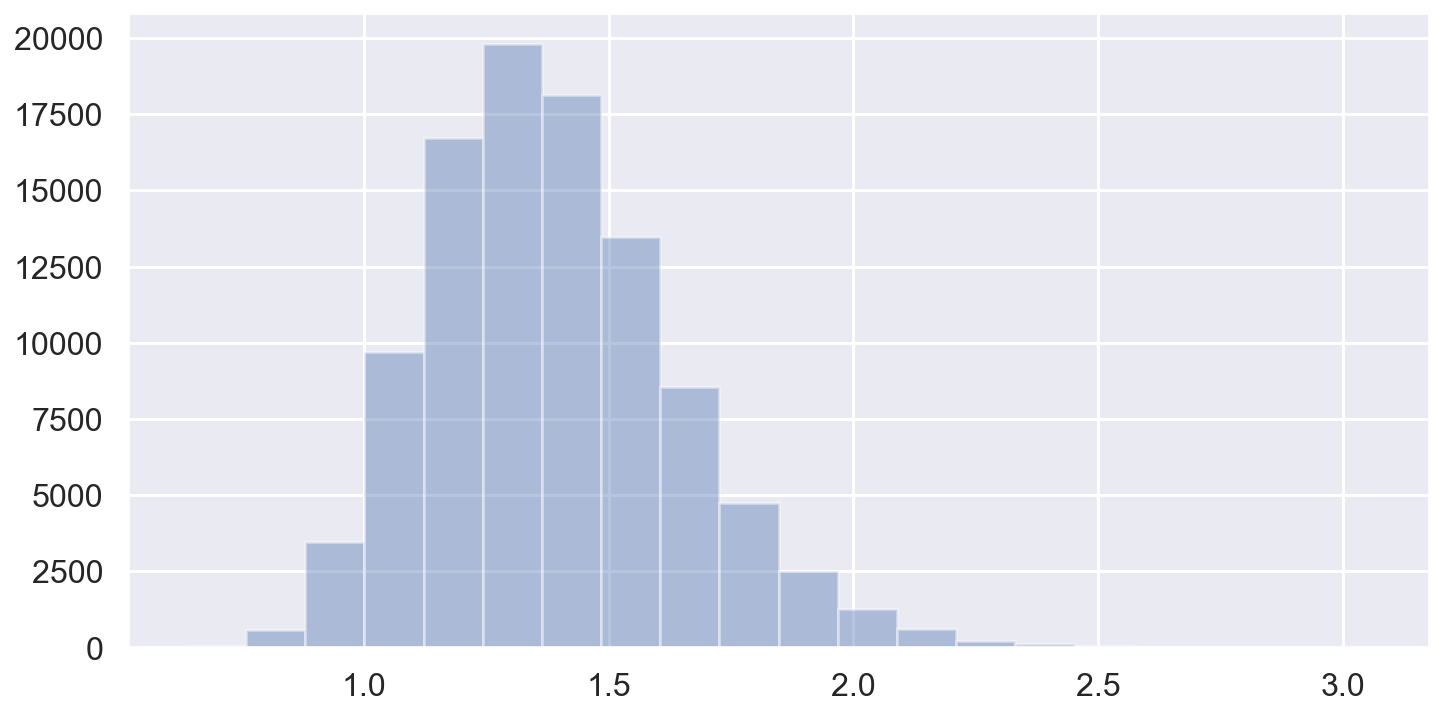

In [24]:
plt.figure(figsize=(12,6), dpi=140)
sns.distplot(ratios, kde=False, bins=20)

In Python you need to create ECDF function yourself, so let's do that

In [25]:
def ecdf(data):
    """ Compute ECDF """
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

In [26]:
x, y = ecdf(ratios)

Please note that our plot can differ from the book due to the random nature of Monte Carlo Simulation

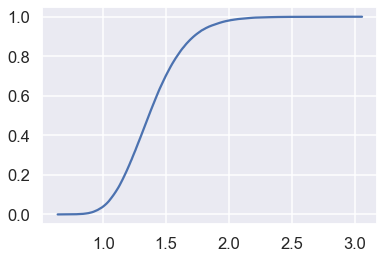

In [27]:
sns.lineplot(x, y) 

### 1. Suppose a director of marketing with many years of experience tells you he believes very strongly that the variant without images (B) won’t perform any differently than the original variant. 
### How could you account for this in our model? Implement this change and see how your final conclusions change as well

In [28]:
prior_a = 300
prior_b = 700
A = beta.rvs(36 + prior_a, 114 + prior_b, size=n_trials)
B = beta.rvs(50 +  prior_a, 100 +  prior_b, size=n_trials)

In [29]:
sum(B > A)/n_trials

0.73872

### 2. The lead designer sees your results and insists that there’s no way that variant B should perform better with no images. She feels that you should assume the conversion rate for variant B is closer to 20 percent than 30 percent. Implement a solution for this and again review the results of our analysis.

In [30]:
a_prior_a = 30
a_prior_b = 70

b_prior_a = 20
b_prior_b = 80

In [31]:
A = beta.rvs(36 + a_prior_a, 114 + a_prior_b, size=n_trials)
B = beta.rvs(50 +  b_prior_a, 100 +  b_prior_b, size=n_trials)

In [32]:
sum(B > A)/n_trials

0.65724

### 3. Assume that being 95 percent certain means that you’re more or less “convinced” of a hypothesis. Also assume that there’s no longer any limit to the number of emails you can send in your test. If the true conversion for A is 0.25 and for B is 0.3, explore how many samples it would take to convince the director of marketing that B was in fact superior. Explore the same for the lead designer.


In [44]:
a_true_rate = 0.25
b_true_rate = 0.3

prior_a = 300
prior_b = 700

p_b_sup = 0
n_samples = 0
n_trials = 100000

In [32]:
def b_superior(B, A, n_trials):
    return sum(B > A)/n_trials

In [33]:
def draw_results(n_samples, rate):
    results = []
    for i in range(int(n_samples/2)):
        draw = random.random()
        results.append(draw)
    results = np.array(results)
    a = sum(results <= rate)
    b = sum(results > rate)
    return a, b

In [43]:
while p_b_sup < 0.95:
    n_samples += 100
    a_samples_a, a_samples_b = draw_results(n_samples, a_true_rate)
    b_samples_a, b_samples_b = draw_results(n_samples, b_true_rate)
    a_samples = beta.rvs(a_samples_a + prior_a, a_samples_b + prior_b, size=n_trials)
    b_samples = beta.rvs(b_samples_a + prior_a, b_samples_b + prior_b, size=n_trials)
    p_b_sup = b_superior(b_samples, a_samples, n_trials)
    print(n_samples)

100
200
300
400
500
600
700
800
900
1000
1100
1200
